In [1]:
%matplotlib inline
import os, pickle
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

font_path = "/home/zhoujb/local/font/Times New Roman.ttf"
mpl.font_manager.fontManager.addfont(font_path)
prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['font.sans-serif'] = ["Times New Roman"]
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['pdf.fonttype'] = 42

RAW_PATH = "/data2/zhoujb/project/cowpea_project/rawData/"
RES_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/Result/"
FIG_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/plotFigure/"

In [2]:
raw_info = pd.read_table(os.path.join(RES_PATH, "Haplotype_Counts_Info.tsv"))
region_info = raw_info[['Chr', 'Start', 'End']].drop_duplicates(ignore_index=True)

data_con = pd.DataFrame(columns=['Chr', 'Start', 'End', "Peak position", "Trait"])
info_data = pd.read_excel(os.path.join(RAW_PATH, "Supplementary Table 22.xlsx"))
info_data = info_data[['Chr', 'Peak position','Trait']].drop_duplicates(ignore_index=True)
for index in info_data.index:
    chr = info_data.loc[index, "Chr"]
    peak_pos = info_data.loc[index, "Peak position"]
    trait = info_data.loc[index, "Trait"]
    tmp_region = region_info[region_info["Chr"]==chr]
    for tmp_index in tmp_region.index:
        if (peak_pos > tmp_region.loc[tmp_index, "Start"]) and (peak_pos < tmp_region.loc[tmp_index, "End"]):
            data_con.loc[len(data_con)] = [chr, tmp_region.loc[tmp_index, "Start"], tmp_region.loc[tmp_index, "End"], peak_pos, trait]

data_con["Region_index"] = data_con["Chr"] + "_" +  data_con["Start"].astype("str") + "_"  + data_con["End"].astype("str")
data_con["Value"] = 1
data_con = data_con.drop_duplicates(subset=["Region_index", "Trait", "Value"])

data_wide = data_con.pivot(columns="Region_index", index="Trait", values="Value")
data_wide = data_wide.fillna(0)
data_wide.columns.name = None
data_wide.index.name = None

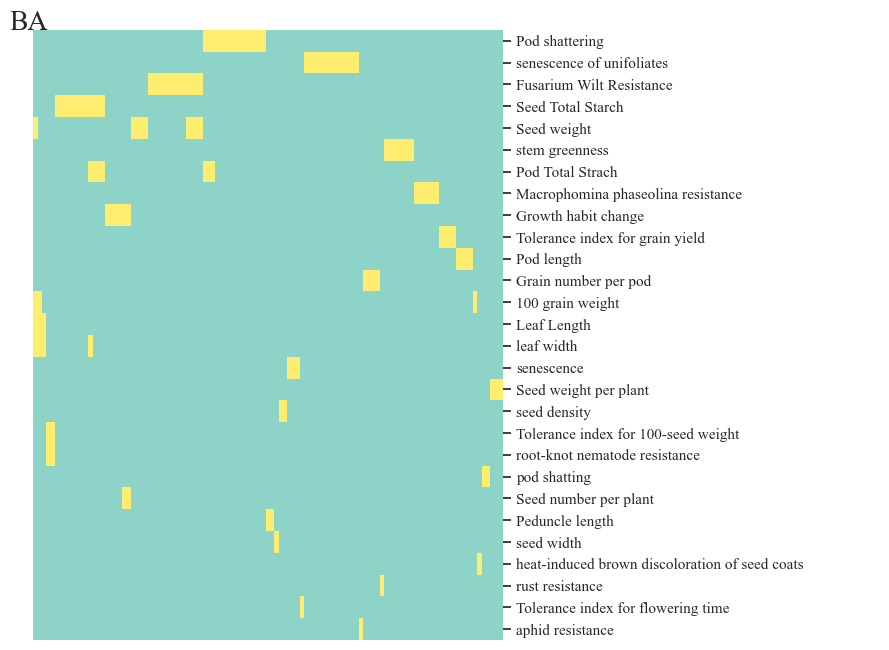

In [5]:
def letter_annotation(ax, xoffset, yoffset, letter):

    mpl.rcParams['font.family'] = prop.get_name()
    mpl.rcParams['font.sans-serif'] = ["Times New Roman"]
    ax.text(xoffset, yoffset, letter, transform=ax.transAxes,
            size=20, weight='bold')

sns.set(font_scale=1)
plt.rc('axes', unicode_minus=False)
    
g = sns.clustermap(data_wide, col_cluster=True, row_cluster=True,
                   xticklabels=False,z_score=None, 
                   cmap="Set3",
                   figsize=(10, 8))

# Remove the dendrogram (https://stackoverflow.com/a/42418968/1878788)
g.ax_col_dendrogram.set_visible(False)
g.ax_row_dendrogram.set_visible(False)

# Adjust the postion of the main colorbar for the heatmap
#g.cax.set_position([1, .5, .02, .2])
g.cax.set_visible(False)

letter_annotation(g.ax_heatmap, -0.05, 1, "BA")

plt.savefig(os.path.join(FIG_PATH, 'fig_1B_region_function_qtl.pdf'), format='pdf', bbox_inches='tight', transparent=True)